In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("disease_800.csv")
df

,Age,Blood_Pressure,Cholesterol,Heart_Rate,BMI,Smoking,Alcohol_Intake,Physical_Activity,Family_History,Disease
0,62,110,180,63,27.58,No,High,Medium,Yes,0
1,30,91,299,113,20.27,Yes,High,Medium,Yes,1
2,31,155,287,62,25.48,No,Low,Medium,No,1
3,53,96,279,92,25.12,No,High,High,Yes,1
4,69,140,175,85,32.40,No,Low,Low,Yes,1
...,...,...,...,...,...,...,...,...,...,...
795,56,156,227,86,21.22,Yes,High,Low,Yes,1
796,56,162,271,109,26.03,Yes,Low,High,Yes,1
797,22,86,159,72,31.13,Yes,Moderate,Low,Yes,1
798,53,141,256,106,24.89,Yes,Moderate,High,Yes,1


In [3]:
Smoking = LabelEncoder()
Alcohol_Intake = LabelEncoder()
Physical_Activity = LabelEncoder()
Family_History = LabelEncoder()


df['Smoking'] = Smoking.fit_transform(df['Smoking'])
df['Alcohol_Intake'] = Alcohol_Intake.fit_transform(df['Alcohol_Intake'])
df['Physical_Activity'] = Physical_Activity.fit_transform(df['Physical_Activity'])
df['Family_History'] = Family_History.fit_transform(df['Family_History'])
df

,Age,Blood_Pressure,Cholesterol,Heart_Rate,BMI,Smoking,Alcohol_Intake,Physical_Activity,Family_History,Disease
0,62,110,180,63,27.58,0,0,2,1,0
1,30,91,299,113,20.27,1,0,2,1,1
2,31,155,287,62,25.48,0,1,2,0,1
3,53,96,279,92,25.12,0,0,0,1,1
4,69,140,175,85,32.40,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
795,56,156,227,86,21.22,1,0,1,1,1
796,56,162,271,109,26.03,1,1,0,1,1
797,22,86,159,72,31.13,1,2,1,1,1
798,53,141,256,106,24.89,1,2,0,1,1


In [4]:
x = df.drop(['Disease'],axis = 1)
y = df['Disease']

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.20,random_state=30)

In [6]:
model = RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [7]:
x_pred = model.predict(x_test)
x_pred


array([1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1])

In [8]:
accuracy = accuracy_score(x_pred,y_test)
accuracy

1.0

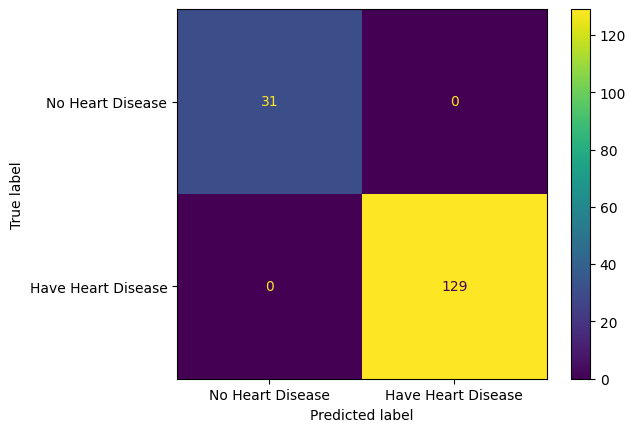

In [9]:
con_matrix = confusion_matrix(x_pred,y_test)
display = ConfusionMatrixDisplay(confusion_matrix= con_matrix  , display_labels = ["No Heart Disease", "Have Heart Disease"])
display.plot()
plt.show()

In [10]:
new_Smoking = Smoking.transform(["Yes"])[0]
new_Alcohol_Intake = Alcohol_Intake.transform(["High"])[0]
new_Physical_Activity = Physical_Activity.transform(["Low"])[0]
new_Family_History = Family_History.transform(["Yes"])[0]


new_data = np.array([[62,110,180,63,27.58,new_Smoking,new_Alcohol_Intake,new_Physical_Activity,new_Family_History]])
prediction = model.predict(new_data)
if prediction[0] == 1:
    print("Have Heart Disease")
else:
    print("No Heart Disease")

Have Heart Disease


c:\Users\91702\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
